In [16]:
#
# Fonction pour generer une chaine de montecarlo
#
import numpy as np

def chaine_markov(transition, etat = 3):
    '''
    Generateur d'une chaine de markov. Les etats sont les indices de la matrice
    
    entrees:
        transition : matrice de transition de Markov (somme de ligne =1)
        etat : état initial de la chaine de Markov
    sorties:
        renvoie : l'état issu d'une simulation à partir de l'etat précédent
    '''
    state = etat
    states = np.arange(transition.shape[0])
    transition = transition
    while (1):
        state = np.random.choice(a=states, size = None, replace = True, p = transition[state,:])
        yield state
        
        

In [205]:
# Probabilité de décès
p1 = 0.03
# Probabilité de guérision
p2 = 0.1
# Probabilité de Vaccination
p4 = 0.05
# Probabilité de Contagion
p3 = 0.05
transition = np.array([[1,0,0,0], [0,1,0,0], [p1, p2, 1. - (p1 + p2), 0],[0,p4, p3, 1. - (p3+p4)]])


In [206]:
etat = 3
sim_markov = chaine_markov(transition, etat)

In [207]:
#
# Taille de la population 
#
population = 5000
sim_population = [chaine_markov(transition, etat) for p in np.arange(population)]

In [208]:
#
# Simulation de la population sur un nombre de jour fixes
#
jours = 150
results={}
results[0] = np.full(shape = population, fill_value = etat)
for jour in np.arange(1,jours):
    results[jour] = np.array([individu.__next__() for individu in sim_population])

In [209]:
#
# Statistiques : histogram par jour
#
#for i in np.arange(4):
#    print(i, np.sum(np.where(results[10]==i, 1,0)))
stats={}
for k,v in results.items():
    stats[k] = np.histogram(v,bins=4, range=[0,3])[0]

In [210]:
stats_array = np.array(list(stats.values()), ndmin=2)

Text(0, 0.5, 'population')

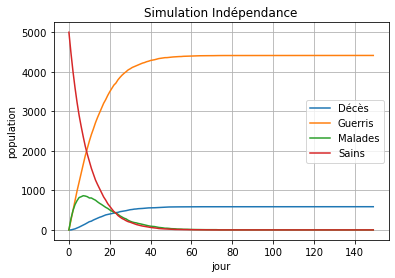

In [211]:
#
# 
#
labels = ['Décès','Guerris', 'Malades','Sains']
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
for i,label in zip(np.arange(4), labels):
    ax.plot(stats_array[:,i], label = label)

ax.legend()
ax.grid()
ax.set_title('Simulation Indépendance')
ax.set_xlabel('jour')
ax.set_ylabel('population')